# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [1]:
pip install palmerpenguins

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [49]:
from palmerpenguins import load_penguins
import pandas as pd

In [3]:
penguins = load_penguins()
penguins=penguins.dropna()
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


When you don't specifiy the variable, it turns all categorical variables to dummy. This can be dangerous of you do not have variables set correctly. FOr example names.  

In [50]:
pd.get_dummies(penguins[["species"]]).head()

,species_Adelie,species_Chinstrap,species_Gentoo
0,True,False,False
1,True,False,False
2,True,False,False
4,True,False,False
5,True,False,False


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [ ]:
penguins['bill_depth_mm']=penguins['bill_depth_mm'].dropna()
penguins['bill_length_mm']=penguins['bill_length_mm'].dropna()

In [51]:
pd.get_dummies(penguins[["species"]]).head()

,species_Adelie,species_Chinstrap,species_Gentoo
0,True,False,False
1,True,False,False
2,True,False,False
4,True,False,False
5,True,False,False


In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


In [19]:

X= penguins[["bill_length_mm"]]
Y= penguins["bill_depth_mm"]

#training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

#fit on training
lr_fit = lr.fit(X_train, y_train)


lr_fit.coef_

array([-0.08396745])

In [20]:
# predict
ytrain_preds= lr_fit.predict(X_train)
ytest_preds = lr_fit.predict(X_test)
ytest_preds
ytrain_preds

array([17.75260236, 17.48390652, 17.5174935 , 17.69382515, 16.3419492 , 17.39993907, 17.12284649, 17.80298283, 17.3495586 , 18.1136624 ,
       17.03887904, 18.27320055, 17.31597162, 16.92132461, 17.17322696, 17.05567253, 17.50070001, 17.2739879 , 17.00529206, 17.81137958,
       17.17322696, 17.63504793, 16.7701832 , 17.83656981, 17.49230327, 17.06406927, 17.03048229, 16.6022483 , 17.42512931, 17.13124323,
       16.73659622, 16.7701832 , 16.90453112, 17.03048229, 17.9457275 , 16.74499296, 16.72819947, 16.65262877, 17.5174935 , 17.9457275 ,
       17.11444974, 17.34116186, 17.58466746, 16.95491159, 17.49230327, 17.81137958, 17.03887904, 17.36635209, 17.46711303, 17.56787397,
       17.48390652, 17.90374377, 16.70300924, 17.36635209, 17.13124323, 16.75338971, 17.59306421, 17.19841719, 17.1816237 , 17.98771122,
       17.58466746, 17.70222189, 17.05567253, 16.75338971, 17.95412424, 17.76939585, 16.58545481, 17.04727578, 17.64344468, 17.5174935 ,
       16.6022483 , 17.76939585, 16.27477

In [23]:
#MSE
from sklearn.metrics import mean_squared_error, r2_score

#linear reg
MSE_lr= mean_squared_error(y_test, ytest_preds)
print(MSE_lr)


3.318180302753481
3.318180302753481


In [24]:
r2_test= r2_score(y_test, ytest_preds)
r2_train= r2_score(y_train, ytrain_preds)
print(r2_test)
print(r2_train)

-0.01551086211769137
0.0525718751481391
-0.01551086211769137
0.0525718751481391


In [25]:
from plotnine import *

In [26]:
pred = lr_fit.predict(X)

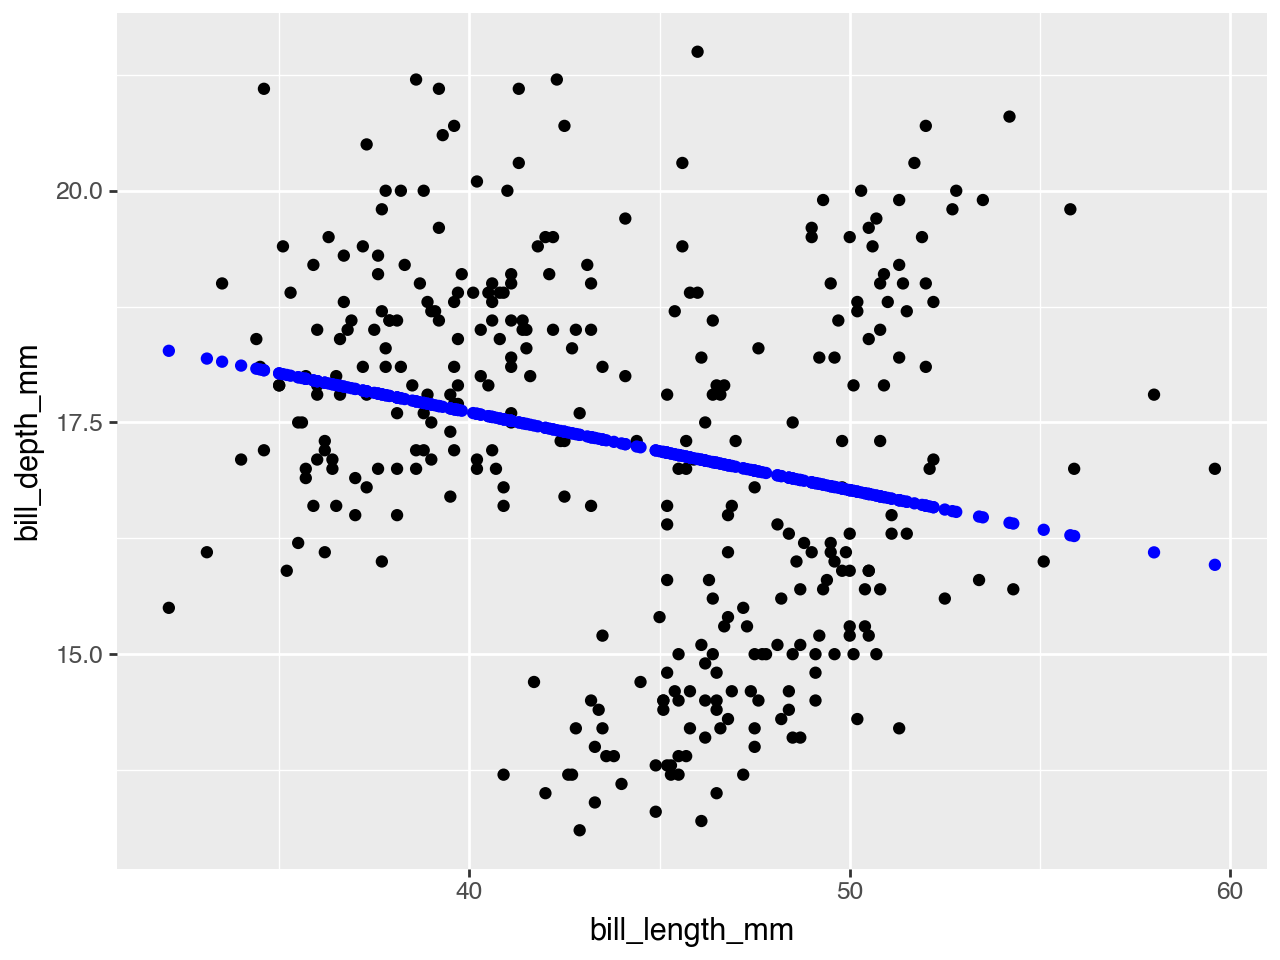

In [27]:
 (ggplot(penguins, aes(x="bill_length_mm", y="bill_depth_mm"))
+ geom_point()
+geom_point(aes(y=pred), color="blue")
)

In [28]:
final_model = lr.fit(X, Y)

final_model.coef_

array([-0.08232675])

In [31]:
penguins['bill_length_mm^2'] = penguins['bill_length_mm']**2
penguins['bill_length_mm^3'] = penguins['bill_length_mm']**3
penguins['bill_length_mm^4'] = penguins['bill_length_mm']**4
penguins['bill_length_mm^5'] = penguins['bill_length_mm']**5
penguins['bill_length_mm^6'] = penguins['bill_length_mm']**6
penguins['bill_length_mm^7'] = penguins['bill_length_mm']**7
penguins['bill_length_mm^8'] = penguins['bill_length_mm']**8
penguins['bill_length_mm^9'] = penguins['bill_length_mm']**9
penguins['bill_length_mm^10'] = penguins['bill_length_mm']**10

In [33]:

X2= penguins[["bill_length_mm", "bill_length_mm^2"]]
y2= penguins["bill_depth_mm"]
lr = LinearRegression()

# train
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25)

#fit on training
lr_fit2 = lr.fit(X2_train, y2_train)


Xtrain_preds2 = lr_fit2.predict(X2_train)
Xtest_preds2 = lr_fit2.predict(X2_test)

#MSE
MSE_lr2= mean_squared_error(y2_test, Xtest_preds2)
print(MSE_lr2)
#rsquared 
r2_test2= r2_score(y2_test, Xtest_preds2)
r2_train2= r2_score(y2_train, Xtrain_preds2)
print(r2_test2)
print(r2_train2)




3.439923273690711
0.1080736564141982
0.10986929236576604
3.439923273690711
0.1080736564141982
0.10986929236576604


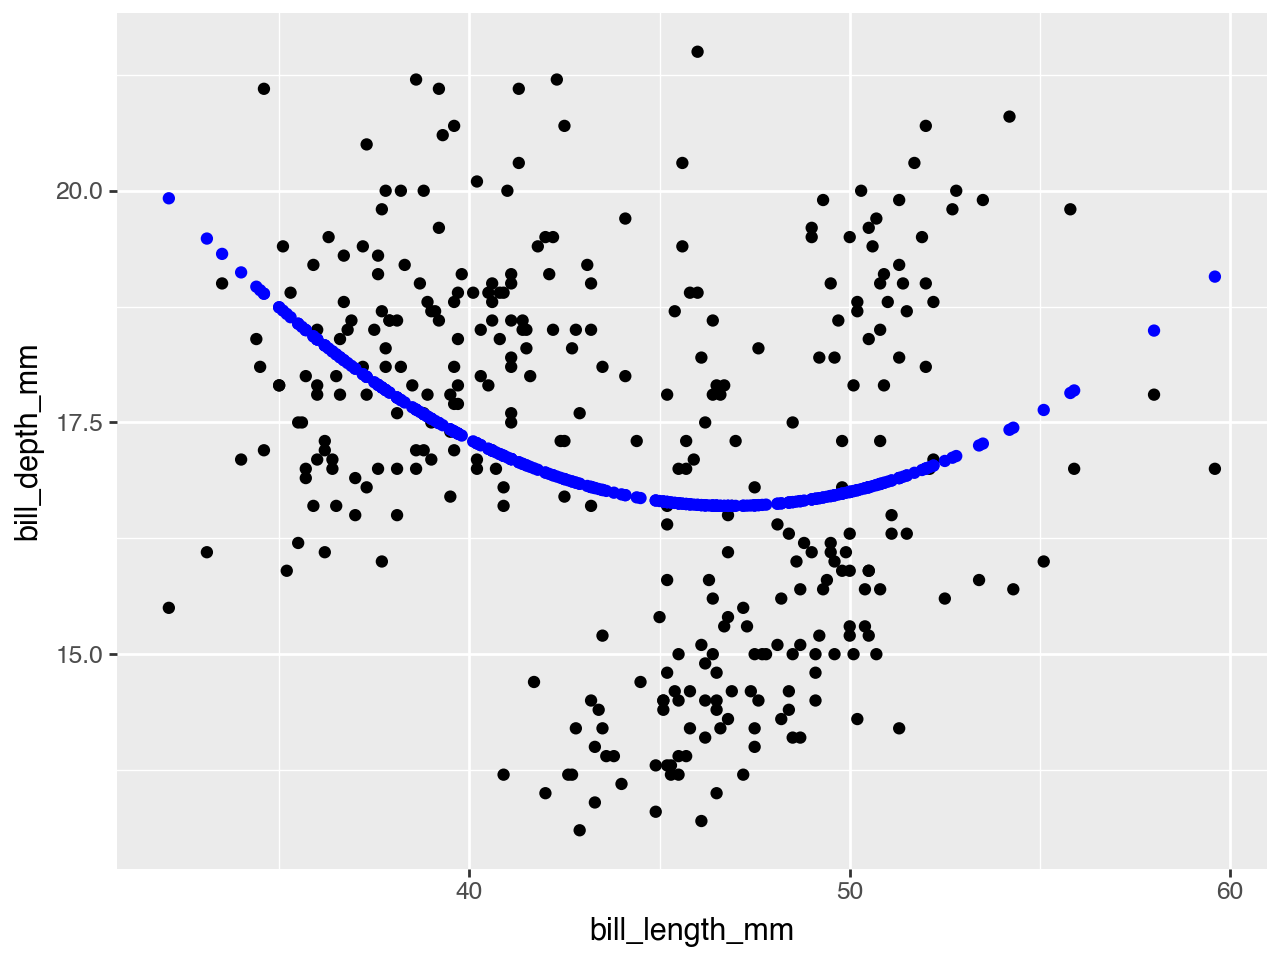

In [34]:
pred2 = lr_fit2.predict(X2)
(ggplot(penguins, aes(x="bill_length_mm", y="bill_depth_mm"))
+ geom_point()
+geom_point(aes(y=pred2), color="blue")
)

In [35]:
X3= penguins[["bill_length_mm", "bill_length_mm^2","bill_length_mm^3"]]
y3= penguins["bill_depth_mm"]
lr = LinearRegression()

In [37]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25)

lr_fit3= lr.fit(X3_train, y3_train)

Xtrain_preds3 = lr_fit3.predict(X3_train)
Xtest_preds3 = lr_fit3.predict(X3_test)


In [38]:
MSE_lr3= mean_squared_error(y3_test, Xtest_preds3)
print(MSE_lr3)

4.016048543625629
4.016048543625629


In [39]:
r2_test3= r2_score(y3_test, Xtest_preds3)
r2_train3= r2_score(y3_train, Xtrain_preds3)
print(r2_test3)
print(r2_train3)

0.08348776515392575
0.14221827941612875
0.08348776515392575
0.14221827941612875


In [40]:
final_model = lr.fit(X3, y3)
final_model.coef_

array([ 6.77963360e+00, -1.68915134e-01,  1.36264370e-03])

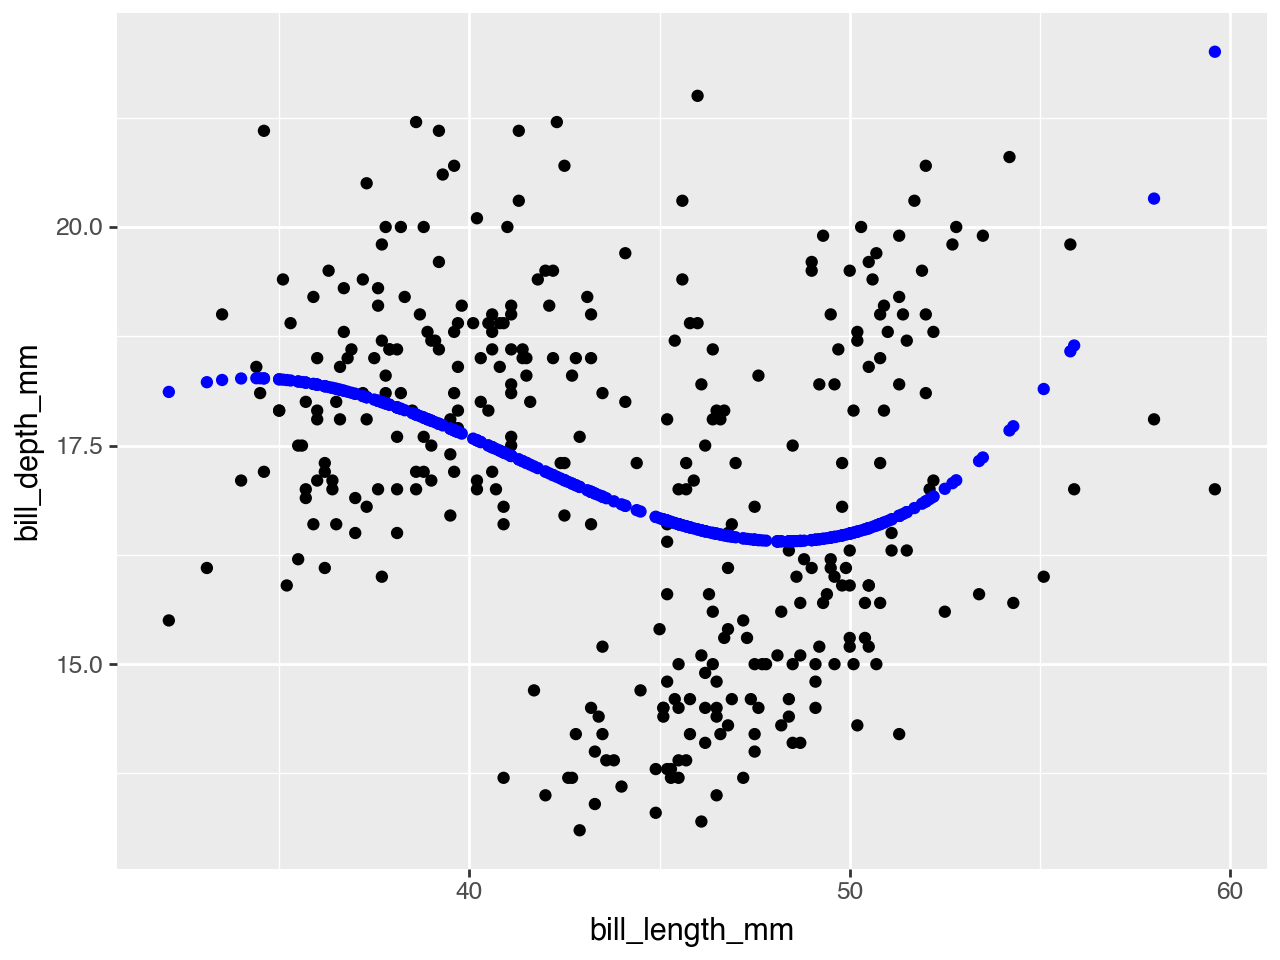

In [41]:
pred3 = lr_fit3.predict(X3)
(ggplot(penguins, aes(x="bill_length_mm", y="bill_depth_mm"))
+ geom_point()
+geom_point(aes(y=pred3), color="blue")
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

In [42]:
X10= penguins[["bill_length_mm", "bill_length_mm^2", "bill_length_mm^3", "bill_length_mm^4", "bill_length_mm^5", "bill_length_mm^6", "bill_length_mm^7", "bill_length_mm^8", "bill_length_mm^9", "bill_length_mm^10"]]
y10= penguins["bill_depth_mm"]
lr = LinearRegression()

In [44]:

#create training
from sklearn.model_selection import train_test_split
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.25)

#fit on train
lr_fit10= lr.fit(X10_train, y10_train)

Xtrain_preds10 = lr_fit10.predict(X10_train)
Xtest_preds10 = lr_fit10.predict(X10_test)

In [45]:
#MSE
MSE_lr10= mean_squared_error(y10_test, Xtest_preds10)
print(MSE_lr10)

3.665282018260005
3.665282018260005


In [46]:
#rsquared
r2_test10= r2_score(y10_test, Xtest_preds10)
r2_train10= r2_score(y10_train, Xtrain_preds10)
print(r2_test10)
print(r2_train10)

0.22312876323983866
0.29657062084431185
0.22312876323983866
0.29657062084431185


In [47]:
final_model = lr.fit(X10, y10)
final_model.coef_

array([-1.12014561e-09, -4.01641572e-08, -1.10274625e-06, -1.87892806e-05, -1.75581475e-04,  1.68768690e-05, -6.56036464e-07,
        1.28398393e-08, -1.26066731e-10,  4.95524577e-13])

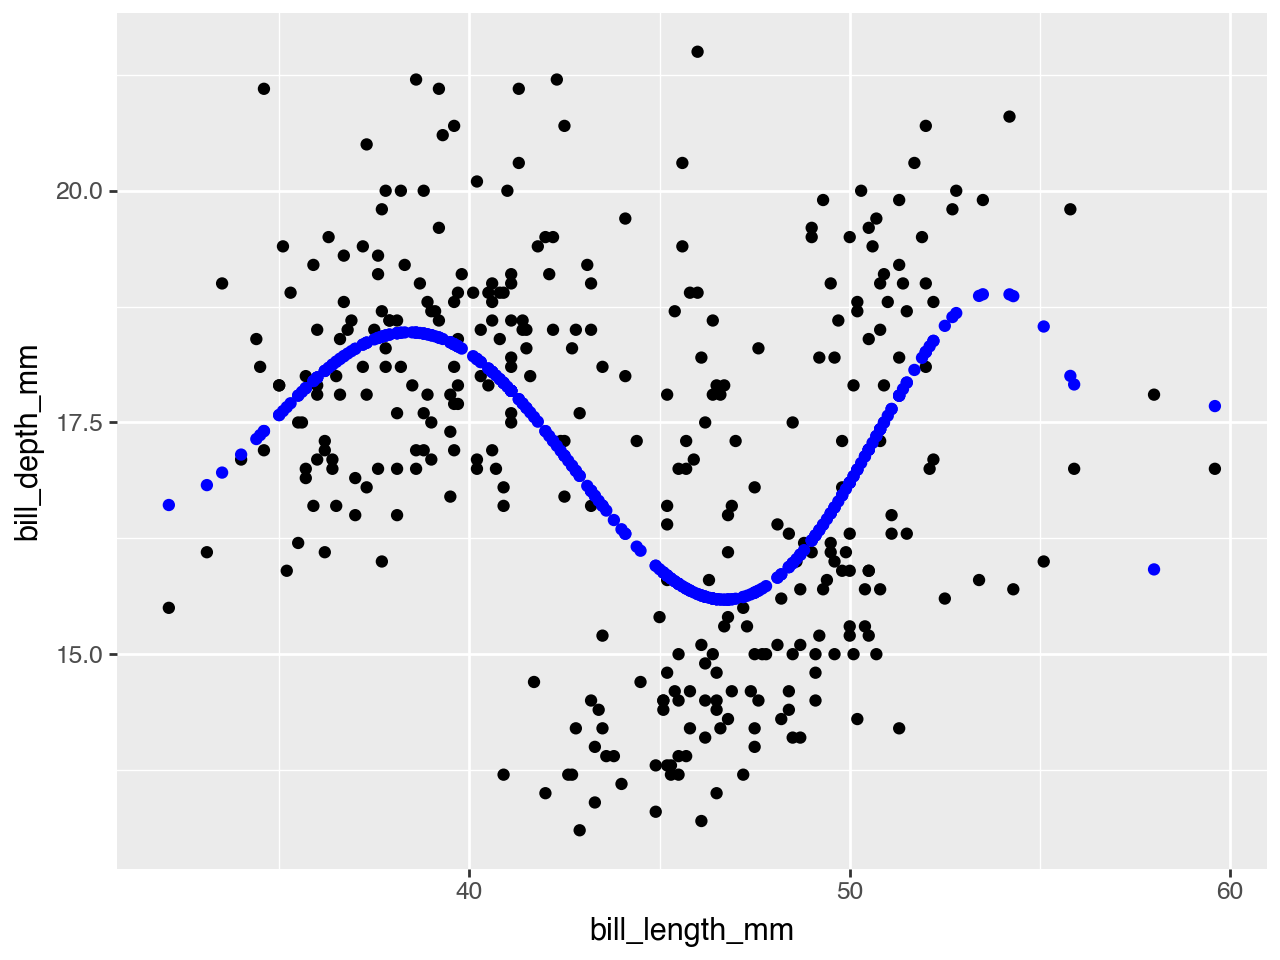

In [48]:
pred10 = lr_fit10.predict(X10)
(ggplot(penguins, aes(x="bill_length_mm", y="bill_depth_mm"))
+ geom_point()
+geom_point(aes(y=pred10), color="blue")
)

I think that the cubic model is the best fit because it has the highest MSE of around 4. The graph shows the curve following the predictions best.